# Nous allons analysé un dataset de Kaggle sur les données des clients d'une banques pour voir qui est eligible pour prendre un prêt ou pas.
## Pour cela nous allons éffectuer quelques étapes :

# Objectif: 
  - Comprendre notre dataset
  - Modeliser
# EDA (exploratory data analysis) :
###  Analyse de la forme :
  - Identification de la target : Loan_Status
  - Nombre de lignes et de colonnes : (614, 13)
  - Types de variables : 8 variables qualitatives et 4 variables quanitative
  - Identification des valeurs manquantes : On remarque que l'on a pas beaucoup de valeurs manquantes
## Analyse de Fond 
  - Visualisation de la target : 60 % de prêt accordé
  - Comprehension des differentes variables (internet)
  - Comprehension des differentes variables : Dependents on vois clairement que dans notre dataset la majorité des gens n'ont pas d'enfants
  - Visualisation des relations features-target : les hommes ont plus de prêt accorder que les femmes, ceux qui ont un historiques de prêt ont pluss  de chance de voir leurs credit accorder que ceux n'en ont pas, moins tu as de dependances plsu tu as de chance qu'on t'accorde un prêt, l'auto-emploi compte beaucoup pour l'accord de prêt
 - Identification des outliers



## Test d'hypothèse nulle (H0):
 - On aacorde plus de prêt qux hommes qu'aux femmes 
  - HO le moyens de prêt accorder aux hommes sont égaux à ceux accorder aux femmes

## Conclusion :
  - On a remarquer qu'on a quelques valeurs manquantes
  - Pas de valeurs dupliqué
  - On a un Target déséquilibré car dans 68 % de cas le prêt à été accorder contre 32 % non accorder
 

# Preprocessing :
  - Après avoir répéré grâce au EDA les problèmes de notre dataset on passe à l'étape du preprocessing dans lequel on va d'abord droper le Loan_ID 
  - Encoder notre dataset 
  - Créer un premier model de ML pour évaluer le dataset et grâce aux differentes metrics essayé de répéré les améliorations possibles 
  - Après avoir vue notre learning curve on s'apperçois qu'on est en Overfetting avec les trainset et que malgré tout le model arrive à généraliser car on est dans les 80 % 
  - On s'appeçois aussi que plus on lui donnera de données pour lutter contre l'overfetting plus on aura un bon model 
  - On a retenu les 6 meilleurs variables après notre test-anova
  

# Developper notre model de ML
  - On va créer de pipeline pour nos model 
  - Aussi normalisé le dataset pour le svm et le KNeighbor
  - Les arbres de decision n'on pas besoin de données normaliser
  - On a entrainé plein de models et on a essayé des voir les differentes metrics 
  - Après viens la phase d'optimisation où on essaye toujours d'amélioré notre model 


##ANALYSE DE LA FORME 

In [8]:
# importation des libraires
import  pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# pour stocker le model
import pickle

In [9]:
test = pd.read_csv('test.csv')

In [10]:
test.shape

(367, 12)

In [11]:
data = pd.read_csv('train.csv')

In [12]:
df_credit = data.copy()

In [13]:
df_credit.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df_credit.shape

(614, 13)

In [15]:
df_credit.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [16]:
df_credit.duplicated().sum()

0

In [17]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
df_credit.drop('Loan_ID',axis=1,inplace=True)

<Axes: >

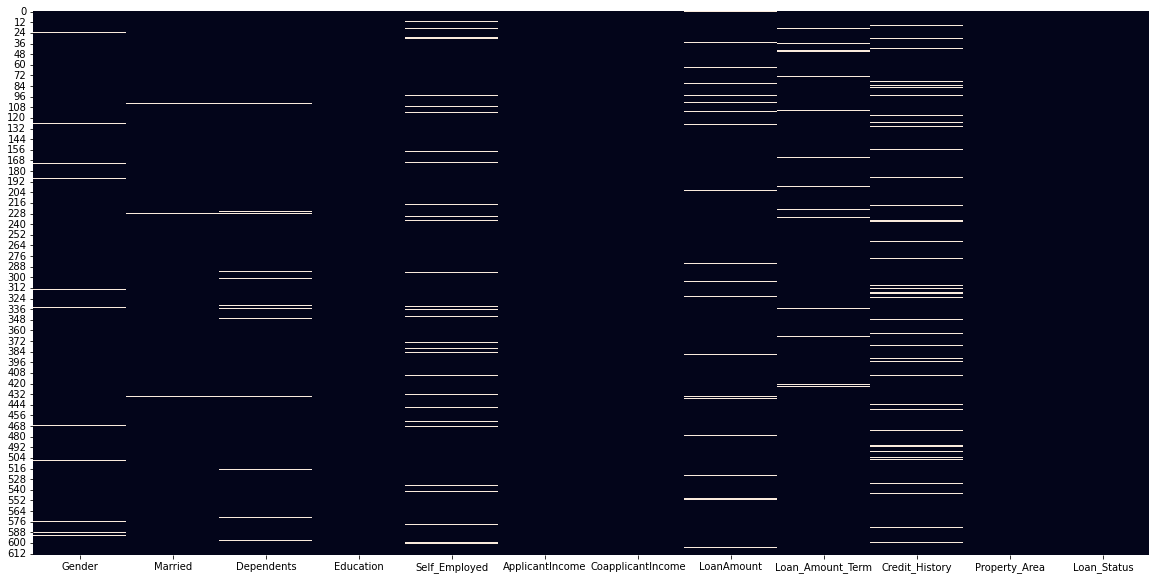

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df_credit.isna(), cbar = False)

In [20]:
(df_credit.isna().sum()/df_credit.shape[0]).sort_values(ascending=True)

Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
Married              0.004886
Gender               0.021173
Loan_Amount_Term     0.022801
Dependents           0.024430
LoanAmount           0.035831
Self_Employed        0.052117
Credit_History       0.081433
dtype: float64

## ANALYSE DE FOND

## Examen de la colonne target 

In [21]:
df_credit.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
df_credit['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'Loan_Status'}>

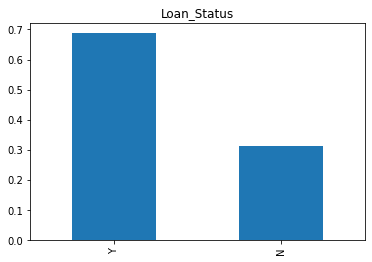

In [23]:
df_credit["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

# Histogramme des variables continues 

<ipython-input-24-b3a9a82c0994>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_credit[col])
<ipython-input-24-b3a9a82c0994>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_credit[col])
<ipython-input-24-b3a9a82c0994>:3: UserWarning: 

`distplot` is a deprecated function and will be remo

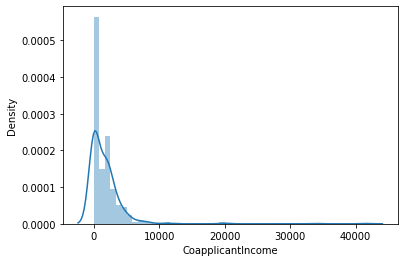

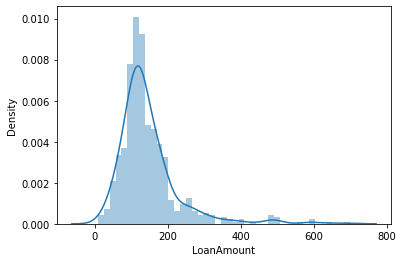

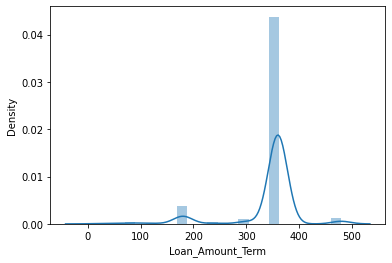

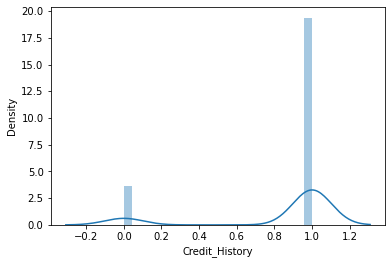

In [24]:
for col in df_credit.select_dtypes('float'):
  plt.figure()
  sns.distplot(df_credit[col])

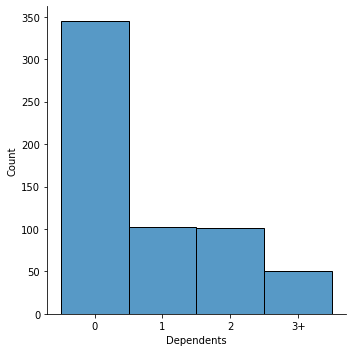

In [25]:
sns.displot(df_credit['Dependents'], bins=10)

## Variables qualitatives 

In [26]:
df_credit['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
for col in df_credit.select_dtypes('object'):
  print(f'{col :-<70} {df_credit[col].unique()}')

Gender---------------------------------------------------------------- ['Male' 'Female' nan]
Married--------------------------------------------------------------- ['No' 'Yes' nan]
Dependents------------------------------------------------------------ ['0' '1' '2' '3+' nan]
Education------------------------------------------------------------- ['Graduate' 'Not Graduate']
Self_Employed--------------------------------------------------------- ['No' 'Yes' nan]
Property_Area--------------------------------------------------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status----------------------------------------------------------- ['Y' 'N']


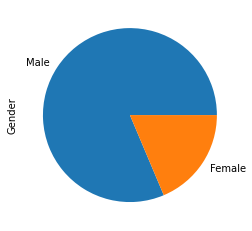

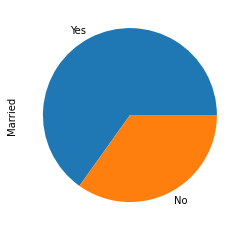

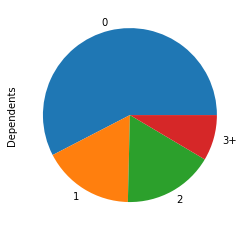

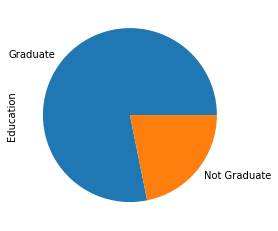

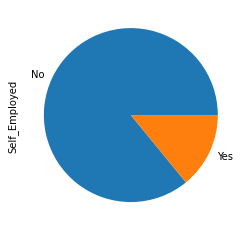

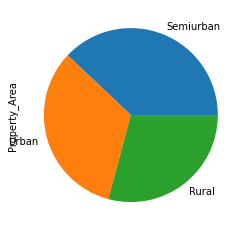

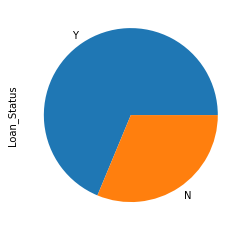

In [28]:
for col in df_credit.select_dtypes('object'):
  plt.figure()    
  df_credit[col].value_counts().plot.pie()

# Relation entre Target et Variable

## Creation des sous ensemble Accorder et Non Accorder

In [29]:
accorder = df_credit[df_credit['Loan_Status'] == 'Y']

In [30]:
non_accorder = df_credit[df_credit['Loan_Status'] == 'N']

In [31]:
var_cat = ['Gender', 'Married','Education',	'Self_Employed','Property_Area','Credit_History','Dependents']
var_num = ['ApplicantIncome'	,'CoapplicantIncome'	,'LoanAmount'	,'Loan_Amount_Term']

## Relation entre Target et Variables

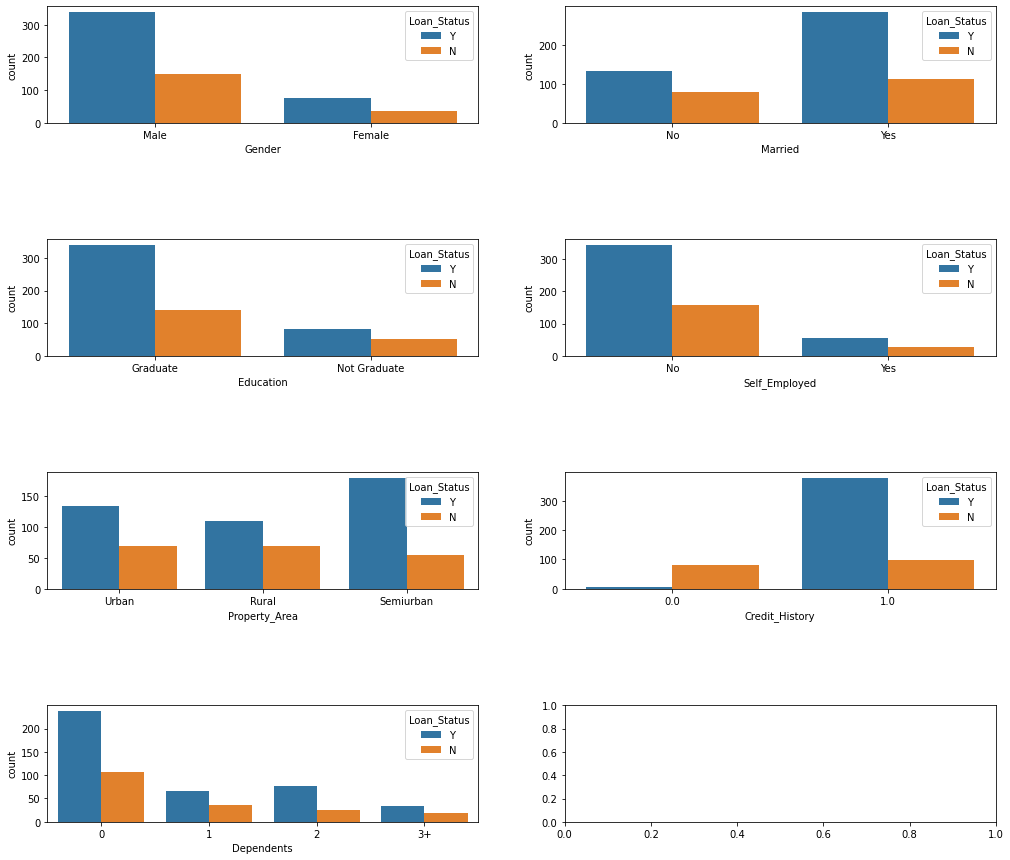

In [32]:
fig, axes=plt.subplots(4,2,figsize=(17,15))
for idx,cat_col in enumerate(var_cat):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df_credit,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

## Relation entre le Genre et Target

<Axes: xlabel='Gender', ylabel='count'>

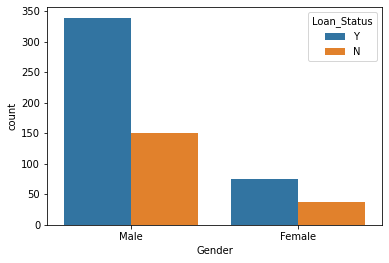

In [33]:
sns.countplot(x='Gender', hue='Loan_Status',data=df_credit)

In [34]:
pd.crosstab(df_credit['Gender'], df_credit['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [35]:
pd.crosstab(df_credit['Dependents'], df_credit['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


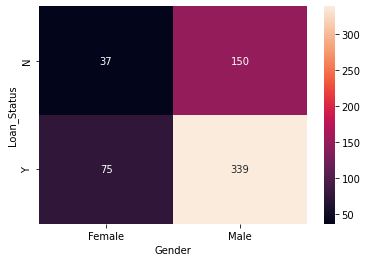

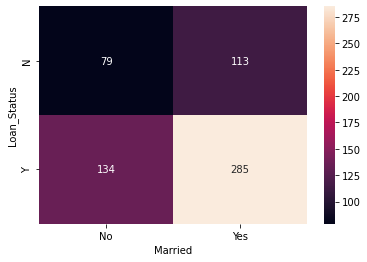

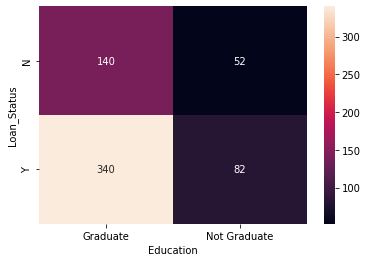

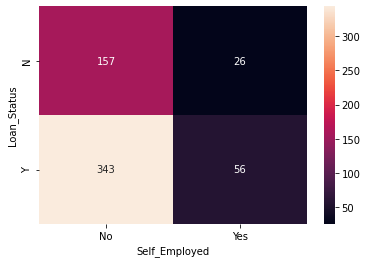

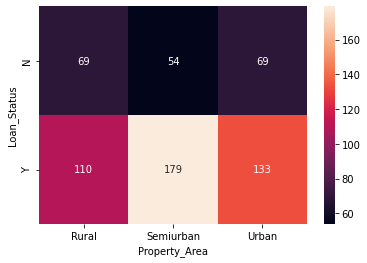

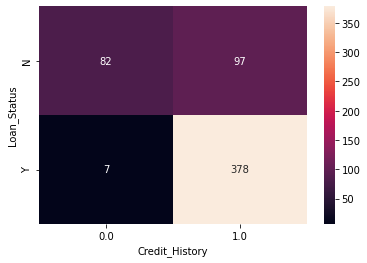

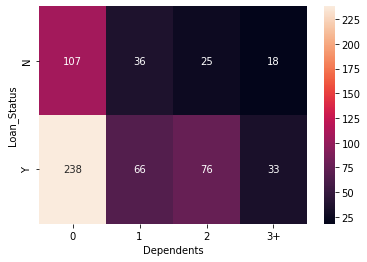

In [36]:
for col in var_cat:
  plt.figure()
  sns.heatmap(pd.crosstab(df_credit['Loan_Status'], df_credit[col]), annot=True, fmt='d')

<Axes: >

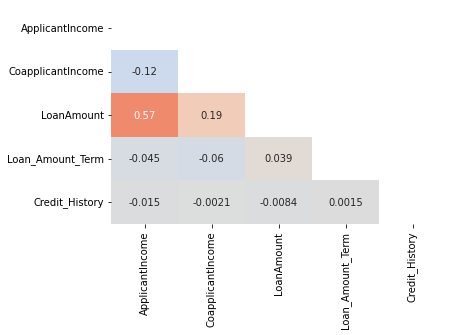

In [37]:
upp_mat = np.triu(df_credit.corr())
sns.heatmap(df_credit.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat, cbar=False)

# Test de Students avec T-Test
 - Pour bien faire cela il faut le nombre de prêt accorder soit équivalent au nombre de prêt non accorder

In [38]:
from scipy.stats import ttest_ind

In [39]:
accorder.shape

(422, 12)

In [40]:
non_accorder.shape

(192, 12)

In [41]:
balanced_ned = non_accorder.sample(accorder.shape[0], replace=True)

In [42]:
def t_test(col):
  alpha= 0.02
  stat, p = ttest_ind( non_accorder.sample(accorder.shape[0], replace=True)[col].dropna()),
  if p < alpha:
    return H

# PREPROCESSING 

In [43]:
data = pd.read_csv('train.csv')

In [44]:
df = data.copy()

In [45]:
df.dropna(axis=0, inplace =True)

In [46]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
Testset = pd.read_csv('test.csv')

In [48]:
Testset.shape

(367, 12)

# Trainset - Nettoyage - Encodage

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [51]:
trainset['Loan_Status'].value_counts()

Y    271
N    113
Name: Loan_Status, dtype: int64

In [52]:
testset['Loan_Status'].value_counts(normalize=True)

Y    0.635417
N    0.364583
Name: Loan_Status, dtype: float64

In [53]:
df.drop('Loan_ID', axis=1, inplace =True)

In [54]:
df['Education'].replace(['Graduate', 'Not Graduate'], ['Graduate','Not_Graduate'], inplace=True)

In [55]:
trainset['Education'].replace(['Graduate', 'Not Graduate'], ['Graduate','Not_Graduate'], inplace=True)

In [56]:
testset.drop('Loan_ID', axis=1, inplace =True)

In [57]:
trainset.drop('Loan_ID', axis=1, inplace =True)

In [58]:
testset['Education'].replace(['Graduate', 'Not Graduate'], ['Graduate','Not_Graduate'], inplace=True)

In [59]:
testset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
18,Male,Yes,0,Not_Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
161,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N
182,Male,Yes,0,Graduate,No,4600,0.0,73.0,180.0,1.0,Semiurban,Y
340,Male,Yes,3+,Not_Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,N
216,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N


In [60]:
for col in df.select_dtypes('object'):
  print(f'{col :-<70} {df[col].unique()}')

Gender---------------------------------------------------------------- ['Male' 'Female']
Married--------------------------------------------------------------- ['Yes' 'No']
Dependents------------------------------------------------------------ ['1' '0' '2' '3+']
Education------------------------------------------------------------- ['Graduate' 'Not_Graduate']
Self_Employed--------------------------------------------------------- ['No' 'Yes']
Property_Area--------------------------------------------------------- ['Rural' 'Urban' 'Semiurban']
Loan_Status----------------------------------------------------------- ['N' 'Y']


In [61]:
code = {
    'Male':0,
    'Female':1,
    'Yes':1,
    'No':0,
    'Rural':0,
    'Urban':1,
    'Semiurban':2,
    "1":1,
    'Graduate':1,
    'Not_Graduate':0,
    '0':0,
    '2':2,
    'Y':1,
    'N':0,
    '3+':3,
           }

In [62]:
for col in df.select_dtypes('object'):
  df[col]=df[col].map(code)

In [63]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1
613,1,0,0,1,1,4583,0.0,133.0,360.0,0.0,2,0


In [64]:
df.dtypes.value_counts()

int64      8
float64    4
dtype: int64

In [65]:
def encodage (df):

  code = {
    'Male':0, 'Female':1, 'Yes':1, 'No':0, 'Rural':0, 'Urban':1, 'Semiurban':2, "1":1, '0':0,  '2':2, '3+':3,'Graduate':1,
    'Not_Graduate':0, 'Y':1,'N':0
      }
  for col in df.select_dtypes('object').columns:
    df.loc[:,col] = df[col].map(code)
  return df


In [66]:
def imputation(df):
  return df.dropna(axis=0)

In [67]:
def preprocessing(df):
  
  df = encodage(df)
  df = imputation(df)

  X = df.drop('Loan_Status', axis = 1)
  y = df['Loan_Status']

  print(y.value_counts())

  return X, y

In [68]:
X_train, y_train = preprocessing(trainset)

1    271
0    113
Name: Loan_Status, dtype: int64


In [69]:
X_test, y_test = preprocessing(testset)

1    61
0    35
Name: Loan_Status, dtype: int64


In [70]:
trainset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
481,0,1,3,0,0,3095,0.0,113.0,360.0,1.0,0,1
341,1,0,0,1,0,2378,0.0,46.0,360.0,1.0,0,0
297,1,1,1,1,0,4666,0.0,135.0,360.0,1.0,1,1
255,1,0,3,1,0,3083,0.0,255.0,360.0,1.0,0,1
271,0,1,0,1,0,11146,0.0,136.0,360.0,1.0,1,1


In [71]:
profil_test  = [[1,1,2,0,0,100,100,123,12,1.0,1]]

In [87]:
AdaBoost.predict(profil_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


array([1])

# Procedure d'évaluation

In [78]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [77]:
def evaluation(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

  plt.figure(figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label = 'Train Score')
  plt.plot(N, val_score.mean(axis=1), label = 'Validation Score')
  plt.legend()


[[13 22]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.93      0.37      0.53        35
           1       0.73      0.98      0.84        61

    accuracy                           0.76        96
   macro avg       0.83      0.68      0.68        96
weighted avg       0.80      0.76      0.73        96



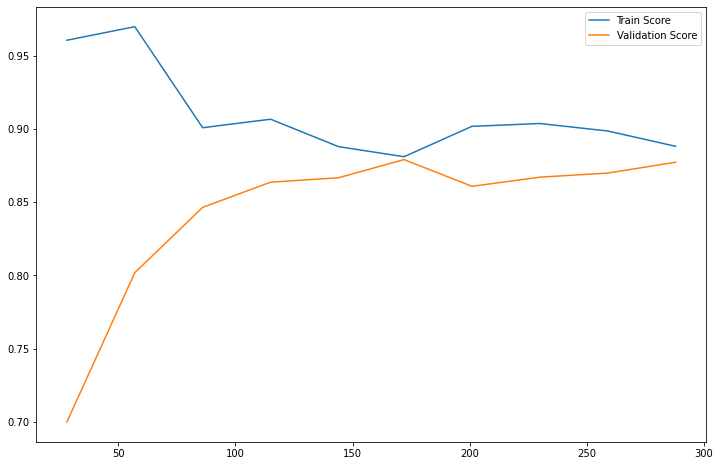

In [86]:
evaluation(AdaBoost)

# Modelisation 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# svm efficace sur les dataset de taille intermediaire
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
# test de anova
# choisir les meilleurs variables pour notre model 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [74]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=5))

In [75]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

In [76]:
dict_list = {'RandomForest':RandomForest,'AdaBoost':AdaBoost,'SVM':SVM,'KNN':KNN}

# OPTIMISATION

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [84]:
hyper_param = {'svc__gamma':[1e-3,1e-4], 'svc__C':[1, 10, 100, 1000], 'pipeline__selectkbest__k':range(4,10)}

In [85]:
grid = GridSearchCV(SVM, hyper_param, scoring ='recall', cv =4)

grid.fit(X_train,y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 4, 'svc__C': 1, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.64      1.00      0.78        61

    accuracy                           0.64        96
   macro avg       0.32      0.50      0.39        96
weighted avg       0.40      0.64      0.49        96



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On a un recall qui atteint 1 es ce une bonne choses ? 
continuons d'abord l'analyse

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
testset.head()

In [ ]:
# Enregistrer le model 
pickle.dump(RandomForest,open('prevision_credit.pkl','wb'))